## Multi Layer Perceptron:

## MNIST Dataset Overview

This example is using MNIST handwritten digits. The dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. For simplicity, each image has been flattened and converted to a 1-D numpy array of 784 features (28*28)

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)
More info: http://yann.lecun.com/exdb/mnist/

In [31]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as pt
%matplotlib inline

from tensorflow.contrib.learn.python.learn.datasets import mnist as input_data 
mnist = input_data.read_data_sets("C:\MyData\publicRepo\TensorFlow\MNIST_data", one_hot=True)

Extracting C:\MyData\publicRepo\TensorFlow\MNIST_data\train-images-idx3-ubyte.gz
Extracting C:\MyData\publicRepo\TensorFlow\MNIST_data\train-labels-idx1-ubyte.gz
Extracting C:\MyData\publicRepo\TensorFlow\MNIST_data\t10k-images-idx3-ubyte.gz
Extracting C:\MyData\publicRepo\TensorFlow\MNIST_data\t10k-labels-idx1-ubyte.gz


In [73]:
learning_rate = 0.1
number_of_epoch = 6
batch_size = 128
print_result = 100
number_of_minibatches = int(mnist.train.num_examples/batch_size)

train_accuracy = []
test_accuracy = []
number_of_input = 28*28
number_of_neuron_hidden1 = 512
number_of_neuron_hidden2 = 256
number_of_classes = 10

In [74]:
g = tf.Graph()

with g.as_default():
    
    X = tf.placeholder("float", [None, number_of_input])
    Y = tf.placeholder("float", [None, number_of_classes])
    
    with tf.name_scope('coefficients') as scope:
        weights = {
            'h1': tf.Variable(tf.random_normal([number_of_input, number_of_neuron_hidden1],mean=0.0, stddev=1.0, seed=99)),
            'h2': tf.Variable(tf.random_normal([number_of_neuron_hidden1, number_of_neuron_hidden2],mean=0.0, stddev=1.0, seed=99)),
            'out': tf.Variable(tf.random_normal([number_of_neuron_hidden2, number_of_classes],mean=0.0, stddev=1.0, seed=99))
        }

        biases = {
            'b1': tf.Variable(tf.random_normal([number_of_neuron_hidden1],mean=0.0, stddev=1.0, seed=99)),
            'b2': tf.Variable(tf.random_normal([number_of_neuron_hidden2],mean=0.0, stddev=1.0, seed=99)),
            'out': tf.Variable(tf.random_normal([number_of_classes],mean=0.0, stddev=1.0, seed=99))
        }
        
        layer_1 = tf.add(tf.matmul(X, weights['h1']), biases['b1'])
        layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
        Y_pred = tf.matmul(layer_2, weights['out']) + biases['out']
        
    with tf.name_scope('cost') as scope:
        cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Y_pred, labels=Y))

    with tf.name_scope('optimizer') as scope:
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_function)
    
    with tf.name_scope('accuracy'):
        correct_pred = tf.equal(tf.argmax(Y_pred, 1), tf.argmax(Y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    
    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        sess.run(init)
        for epoch_humber in range(1, number_of_epoch+1):
            for mini_batch_number in range(1, number_of_minibatches+1):
                X_batch, Y_batch = mnist.train.next_batch(batch_size)
                sess.run(optimizer, feed_dict={X: X_batch, Y: Y_batch})
                if mini_batch_number % print_result == 0 or mini_batch_number == 1:
                    cost, acc = sess.run([cost_function, accuracy], feed_dict={X: X_batch, Y: Y_batch})
                    print("Epoch Number" + str(epoch_humber) + ", MiniBatch Number: " + str(mini_batch_number) + ", Minibatch Loss= " + \
                      "{:.4f}".format(cost) + ", Training Accuracy= " + "{:.3f}".format(acc))
            train_accuracy.append(sess.run(accuracy, feed_dict={X: mnist.train.images, Y: mnist.train.labels}))
            test_accuracy.append(sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
        
        print("Optimization Completed!")
        print("Training Accuracy:", sess.run(accuracy, feed_dict={X: mnist.train.images, Y: mnist.train.labels}))
        print("Testing Accuracy:", sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))        

Epoch Number1, MiniBatch Number: 1, Minibatch Loss= 19139.8594, Training Accuracy= 0.172
Epoch Number1, MiniBatch Number: 100, Minibatch Loss= 1033.8794, Training Accuracy= 0.844
Epoch Number1, MiniBatch Number: 200, Minibatch Loss= 209.4801, Training Accuracy= 0.852
Epoch Number1, MiniBatch Number: 300, Minibatch Loss= 82.2784, Training Accuracy= 0.906
Epoch Number1, MiniBatch Number: 400, Minibatch Loss= 53.2275, Training Accuracy= 0.898
Epoch Number2, MiniBatch Number: 1, Minibatch Loss= 21.1698, Training Accuracy= 0.938
Epoch Number2, MiniBatch Number: 100, Minibatch Loss= 41.6401, Training Accuracy= 0.875
Epoch Number2, MiniBatch Number: 200, Minibatch Loss= 47.3935, Training Accuracy= 0.852
Epoch Number2, MiniBatch Number: 300, Minibatch Loss= 65.4996, Training Accuracy= 0.859
Epoch Number2, MiniBatch Number: 400, Minibatch Loss= 79.2852, Training Accuracy= 0.852
Epoch Number3, MiniBatch Number: 1, Minibatch Loss= 90.2924, Training Accuracy= 0.883
Epoch Number3, MiniBatch Number:

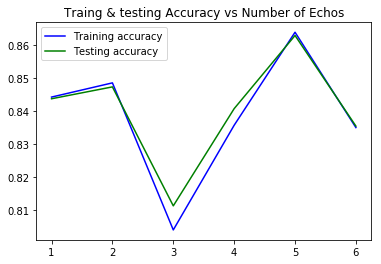

In [76]:
pt.plot(list(range(1,number_of_epoch+1)),train_accuracy,'b',label= "Training accuracy")
pt.plot(list(range(1,number_of_epoch+1)),test_accuracy,'g',label= "Testing accuracy")
pt.title("Traing & testing Accuracy vs Number of Echos")
pt.legend()
pt.show()